In [1]:
from fastai.text import *
import pandas as pd

In [45]:
torch.cuda.is_available()

True

In [ ]:
#data_path = Config.data_path()


In [2]:
path = Path('../data/processed')

In [3]:
df = pd.read_csv(path/'03_classification_valid_train.csv', error_bad_lines=False, index_col=0)

In [4]:
df

,Primary Category,Secondary Category,Title,URL,scheme,netloc,url1,url2,url3,url4,url5,url6,is_valid
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,http,"['www', 'sixty8', 'com']",www,sixty8,com,NaN,NaN,NaN,False
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,http,"['www', 'abandonedcommunities', 'co', 'uk']",www,abandonedcommunities,co,uk,NaN,NaN,False
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,http,"['www', 'greekthomson', 'com']",www,greekthomson,com,NaN,NaN,NaN,False
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,http,"['www', 'arabbritishcentre', 'org', 'uk']",www,arabbritishcentre,org,uk,NaN,NaN,False
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,http,"['www', 'aaschool', 'ac', 'uk']",www,aaschool,ac,uk,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11851,Education & Research,"Libraries, Archives and Museums",SAS-Space,http://sas-space.blogspot.com/,http,"['sas-space', 'blogspot', 'com']",sas-space,blogspot,com,NaN,NaN,NaN,True
7781,"Business, Economy & Industry",Industries,IEA Clean Coal Centre (CCC),http://www.iea-coal.org.uk/,http,"['www', 'iea-coal', 'org', 'uk']",www,iea-coal,org,uk,NaN,NaN,True
19365,Medicine & Health,Women's Issues,"Thousand Reasons, A",http://athousandreasons.com/,http,"['athousandreasons', 'com']",athousandreasons,com,NaN,NaN,NaN,NaN,True
24685,Society & Culture,"Sociology, Anthropology and Population Studies",Phil Vasili's History of Black Footballers,http://www.vasili.co.uk/,http,"['www', 'vasili', 'co', 'uk']",www,vasili,co,uk,NaN,NaN,True


In [5]:
df.Title.to_csv(path/'lm_data.txt', header=None, index=None, sep=' ', mode='w')

In [11]:
Path('../data/processed/text').mkdir()

In [12]:
for i,k in df.iterrows():
    txt = k['Title']
    with open(f'../data/processed/text/{i}.txt','a') as f:
        f.write(txt)

In [13]:
data = Path('../data/processed/text/')

data.ls()

[PosixPath('../data/processed/text/6910.txt'),
 PosixPath('../data/processed/text/17258.txt'),
 PosixPath('../data/processed/text/1096.txt'),
 PosixPath('../data/processed/text/23391.txt'),
 PosixPath('../data/processed/text/9803.txt'),
 PosixPath('../data/processed/text/10617.txt'),
 PosixPath('../data/processed/text/6247.txt'),
 PosixPath('../data/processed/text/14882.txt'),
 PosixPath('../data/processed/text/9799.txt'),
 PosixPath('../data/processed/text/24062.txt'),
 PosixPath('../data/processed/text/8587.txt'),
 PosixPath('../data/processed/text/19482.txt'),
 PosixPath('../data/processed/text/10862.txt'),
 PosixPath('../data/processed/text/9410.txt'),
 PosixPath('../data/processed/text/12987.txt'),
 PosixPath('../data/processed/text/1968.txt'),
 PosixPath('../data/processed/text/3732.txt'),
 PosixPath('../data/processed/text/14990.txt'),
 PosixPath('../data/processed/text/12666.txt'),
 PosixPath('../data/processed/text/13979.txt'),
 PosixPath('../data/processed/text/18130.txt'),
 

In [26]:
!kaggle datasets download -d manyregression/sp-en-wiki-100kk

 99%|███████████████████████████████████████▌| 819M/827M [00:18<00:00, 41.3MB/s]
100%|████████████████████████████████████████| 827M/827M [00:18<00:00, 47.6MB/s]


In [28]:
!unzip sp-en-wiki-100kk.zip

Archive:  sp-en-wiki-100kk.zip
  inflating: data/data_en_wiki_15000  
  inflating: data/data_en_wiki_15000_bwd  
  inflating: data/tmp/spm.model      
  inflating: data/tmp/spm.vocab      


In [30]:
!ls 

01_data.ipynb		04_nlp.ipynb	   data
02_random_forest.ipynb	"cache_dir".model  models
_03_tabular.ipynb	"cache_dir".vocab  sp-en-wiki-100kk.zip


## Unigram 

In [17]:
Path('../data/processed/text/tmp/spm/').mkdir()

In [34]:
!ls data/tmp

spm.model  spm.vocab


In [35]:
!cp data/tmp/spm.model ../data/processed/text/tmp/spm/spm.model
!cp data/tmp/spm.vocab ../data/processed/text/tmp/spm/spm.vocab

In [39]:
dlm = (TextList.from_folder(data, extensions='.txt',processor=[OpenFileProcessor(),SPProcessor(model_type='unigram')])
       .split_by_rand_pct().
       label_for_lm().databunch(bs=32))

In [40]:
dlm

TextLMDataBunch;

Train: LabelList (21439 items)
x: LMTextList
▁xxbos ▁xxmaj ▁di age o,▁xxbos ▁xxmaj ▁lady ▁xxmaj ▁caroline ▁xxmaj ▁lamb ▁xxmaj ▁website , ▁xxmaj ▁the,▁xxbos ▁xxmaj ▁cave nd ish,▁xxbos ▁xxmaj ▁children ▁and ▁xxmaj ▁technology ▁xxmaj ▁lab , ▁xxmaj ▁the,▁xxbos ▁xxmaj ▁random ▁xxmaj ▁acts ▁of ▁xxmaj ▁reality ▁ - ▁xxmaj ▁trying ▁to ▁kill ▁as ▁few ▁people ▁as ▁possible
y: LMLabelList
,,,,
Path: ../data/processed/text;

Valid: LabelList (5359 items)
x: LMTextList
▁xxbos ▁display link,▁xxbos ▁xxmaj ▁skills ▁dash board s kill s ▁xxmaj ▁dash board,▁xxbos ▁men tra u - ia i th . com ment ra u - ia i th . com,▁xxbos ▁xxmaj ▁francis ca ▁pri e to franc is ca ▁xxmaj ▁pri e to,▁xxbos ▁xxmaj ▁light ▁xxmaj ▁blue ▁xxmaj ▁ optic s
y: LMLabelList
,,,,
Path: ../data/processed/text;

Test: None

## LM

# Use title to start

In [41]:
LM_learn = language_model_learner(dlm, AWD_LSTM, pretrained=True, drop_mult=0.5)

In [42]:
LM_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


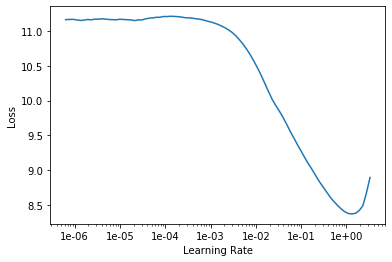

In [43]:
LM_learn.recorder.plot()

In [44]:
LM_learn.fit_one_cycle(10,max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,4.866141,4.380974,0.360128,00:50
1,4.362373,4.131312,0.382628,00:51
2,3.967971,3.773073,0.407487,00:51
3,3.473222,3.409045,0.447513,00:51
4,3.023320,3.311126,0.460957,00:51


In [46]:
#LM_learn.path
LM_learn.save_encoder('ft_enc')

In [47]:
#

LM_learnassification 

In [82]:
!cp ../data/processed/text/tmp/spm/spm.vocab ../data/processed/text/tmp/spm.vocab 
!cp ../data/processed/text/tmp/spm/spm.model ../data/processed/text/tmp/spm.model 

In [122]:
model = Path('../data/processed/text/')


In [81]:
data_class = (TextList.
        from_df(df,path='.',cols=['Title'],processor=SPProcessor.load(model))
        .split_from_df('is_valid')
        .label_from_df('Primary Category')
        .databunch(bs=32))

In [83]:
learn_class = text_classifier_learner(data_class,AWD_LSTM, drop_mult=0.5)

In [84]:
learn_class.path = LM_learn.path


In [85]:
learn_class.load_encoder('ft_enc');

RNNLearner(data=TextClasDataBunch;

Train: LabelList (26798 items)
x: TextList
▁xxbos ▁68 ▁xxmaj ▁dean ▁xxmaj ▁street,▁xxbos ▁xxmaj ▁abandoned ▁xxmaj ▁communities,▁xxbos ▁xxmaj ▁alexander ▁xxmaj ▁thomson ▁xxmaj ▁society,▁xxbos ▁xxmaj ▁arab ▁xxmaj ▁british ▁xxmaj ▁centre , ▁xxmaj ▁the,▁xxbos ▁xxmaj ▁architectural ▁xxmaj ▁association ▁xxmaj ▁school ▁of ▁xxmaj ▁architecture
y: CategoryList
Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities,Arts & Humanities
Path: .;

Valid: LabelList (8039 items)
x: TextList
▁xxbos ▁scarlet fin der s,▁xxbos ▁xxmaj ▁historic ▁xxmaj ▁chapel s ▁xxmaj ▁trust,▁xxbos ▁xxmaj ▁clear view ▁xxmaj ▁sto ve s,▁xxbos ▁xxmaj ▁people ▁in ▁xxmaj ▁common,▁xxbos ▁xxmaj ▁refuge e ▁xxmaj ▁education
y: CategoryList
Medicine & Health,Religion,Business, Economy & Industry,Society & Culture,Education & Research
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(15000, 400, padding_idx=1)
   

In [86]:
learn_class.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


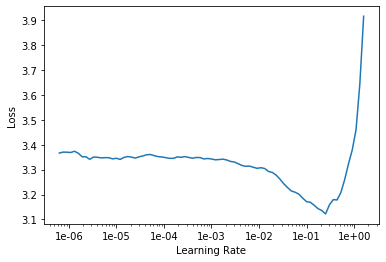

In [87]:
learn_class.recorder.plot()

In [88]:
learn_class.fit_one_cycle(10, max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,2.170552,1.996822,0.350417,00:53
1,2.112939,1.972515,0.350541,00:55
2,2.170231,1.965745,0.361239,00:53
3,2.123559,1.923996,0.367583,00:55
4,2.061414,1.885094,0.374798,00:55
5,2.057293,1.875409,0.377783,01:00
6,2.059528,1.839775,0.379525,00:58
7,1.993011,1.806899,0.390845,01:02
8,1.979402,1.805210,0.394079,00:55
9,2.018788,1.798886,0.395198,00:58


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


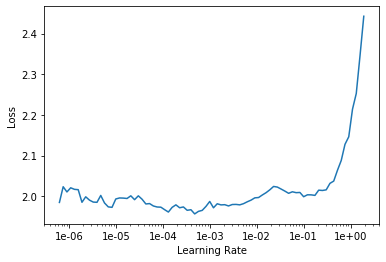

In [91]:
learn_class.lr_find()
learn_class.recorder.plot()

In [92]:
learn_class.fit_one_cycle(5, max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,1.965993,1.802263,0.391964,00:52
1,1.988734,1.787620,0.398557,01:00
2,2.019126,1.795546,0.394825,00:56
3,2.034778,1.784410,0.398806,00:59
4,2.027470,1.786252,0.396567,00:58


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


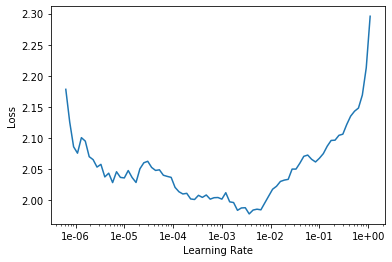

In [93]:
learn_class.unfreeze()
learn_class.lr_find()
learn_class.recorder.plot()

In [94]:
learn_class.fit_one_cycle(5, max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,2.006935,1.763348,0.404901,01:06
1,1.910272,1.708965,0.418460,01:06
2,1.890975,1.661656,0.435378,01:08
3,1.835483,1.644081,0.440602,01:08
4,1.847951,1.631714,0.444956,01:09


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


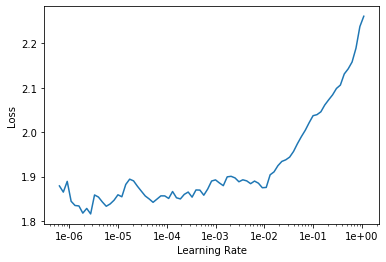

In [95]:
learn_class.unfreeze()
learn_class.lr_find()
learn_class.recorder.plot()

In [96]:
learn_class.fit_one_cycle(2, max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,1.866252,1.627139,0.445951,01:06
1,1.841181,1.631806,0.443339,01:10


# Without sentencepiece 

In [171]:
dlm = (TextList.
        from_df(df,path='.',cols=['Title'])
        .split_from_df('is_valid')
        .label_for_lm()
        .databunch(bs=32))

In [172]:
LM_learn = language_model_learner(dlm, AWD_LSTM, pretrained=True, drop_mult=0.5)

In [173]:
LM_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


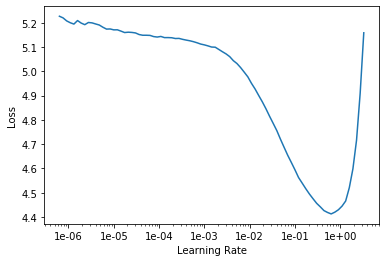

In [174]:
LM_learn.recorder.plot()

In [175]:
LM_learn.fit_one_cycle(5,max_lr=slice(1e-02,1e-01))

epoch,train_loss,valid_loss,accuracy,time
0,3.111815,2.470443,0.572270,00:36
1,2.942837,2.322211,0.593877,00:37
2,2.607529,1.958451,0.640434,00:37
3,2.209737,1.652640,0.687207,00:37
4,1.929090,1.573962,0.700128,00:37


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


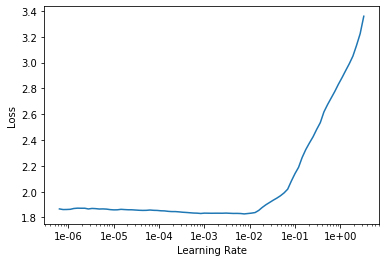

In [176]:
LM_learn.unfreeze()
LM_learn.lr_find()
LM_learn.recorder.plot()

In [182]:
LM_learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,1.853740,1.555253,0.703406,00:38
1,1.823142,1.546574,0.705179,00:38


In [183]:
LM_learn.save_encoder('word_ft_enc')

In [184]:
vocab = dlm.vocab

In [185]:
data_class = (TextList.
        from_df(df,path='.',cols=['Title'],vocab=dlm.train_ds.vocab)
        .split_from_df('is_valid')
        .label_from_df('Primary Category')
        .databunch(bs=32))

In [186]:
learn_class = text_classifier_learner(data_class,AWD_LSTM, drop_mult=0.5)
learn_class.load_encoder('word_ft_enc');

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


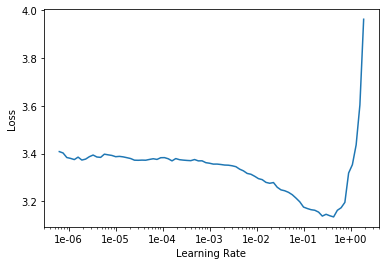

In [187]:
learn_class.lr_find()
learn_class.recorder.plot()

In [188]:
learn_class.fit_one_cycle(10,max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,2.129705,2.012883,0.360990,00:43
1,2.281075,2.056669,0.340465,00:50
2,2.307600,2.110261,0.326782,00:45
3,2.256448,2.099133,0.355517,00:48
4,2.260271,4.242759,0.335365,00:45
5,2.242835,2.090752,0.328399,00:47
6,2.147976,1.963152,0.378654,00:44
7,2.069212,1.915088,0.380147,00:50
8,2.050514,1.844476,0.402040,00:51
9,2.004862,1.840517,0.405026,00:48


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


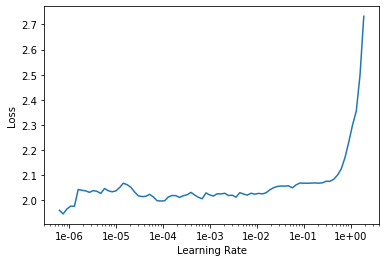

In [190]:
learn_class.lr_find()
learn_class.recorder.plot()

In [191]:
learn_class.fit_one_cycle(5,max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,1.974678,1.842397,0.403906,00:44
1,2.007590,1.834584,0.403284,00:51
2,2.015766,1.808306,0.412738,00:49
3,1.986622,1.830137,0.406021,00:50
4,2.007059,1.823346,0.406145,00:51


## LM on the URL 

In the previous notebook tabular data was generated by splitting the URLS somewhat crudely. It might be better to just use the URLS in a LM. Since the urls are esentially one word we'll start with BPE tokenization. This will hopefully also help us deal with any out of vocabularly words that might occur because the website is about a specialist domain. 

In [125]:
Path('../data/processed/url_text').mkdir()

PosixPath('../data/processed')

In [223]:
df.URL.to_csv(path/'url_lm_data.txt', header=None, index=None, sep=' ', mode='w')

In [224]:
path.ls()

[PosixPath('../data/processed/text'),
 PosixPath('../data/processed/tmp'),
 PosixPath('../data/processed/lm_data.txt'),
 PosixPath('../data/processed/url_text'),
 PosixPath('../data/processed/03_classification_valid_train.csv'),
 PosixPath('../data/processed/lm_url_data.txt'),
 PosixPath('../data/processed/url_lm_data.txt')]

In [246]:
import sentencepiece as spm
spm.SentencePieceTrainer.train('--input=../data/processed/url_lm_data.txt --model_prefix=spm --vocab_size=2000 --model_type=BPE')
sp = spm.SentencePieceProcessor()


In [247]:
!ls

01_data.ipynb		"cache_dir".model  models		 spm.vocab
02_random_forest.ipynb	"cache_dir".vocab  m.vocab		 tmp
_03_tabular.ipynb	data		   sp-en-wiki-100kk.zip  url.model
04_nlp.ipynb		m.model		   spm.model		 url.vocab


In [242]:
#!mkdir tmp

mkdir: cannot create directory ‘tmp’: File exists


In [248]:
!mv spm.vocab tmp/spm.vocab 
!mv spm.model tmp/spm.model

In [261]:
dlm = (TextList.
        from_df(df,path='.',cols=['URL'],
                processor=[OpenFileProcessor(),SPProcessor.load('.')])
        .split_from_df('is_valid')
        .label_for_lm()
        .databunch(bs=64))

In [262]:
dlm.show_batch()

idx,text
0,x bo s ▁http : ▁ / ▁ / ▁ www . ar abb ri tish centre . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . a as chool . ac . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . ah ra - archit ect ure . org ▁ /
1,s ▁http : ▁ / ▁ / ▁ www . or i ent al ru g and tex ti les ociety . org . uk ▁ / ▁ index . php ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . or ig ins festival . bor der cross ings . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁
2,. mem ory sc ap e . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . ge og . leeds . ac . uk ▁ / ▁ people ▁ / ▁ a . tur ner ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . mor et on hamp ste ad . org .
3,/ ▁ hu gh william williams ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . the hu gh es collection . co . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . hull history centre . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ i hr
4,▁http : ▁ / ▁ / ▁ www . wall ing ford museum . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . w for al history . org . uk ▁ / ▁ x x bo s ▁http : ▁ / ▁ / ▁ www . tw g p p . org ▁ / ▁ x x bo s


In [264]:
lm_learn = language_model_learner(dlm, AWD_LSTM, pretrained=True).to_fp16()

In [265]:
lm_learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


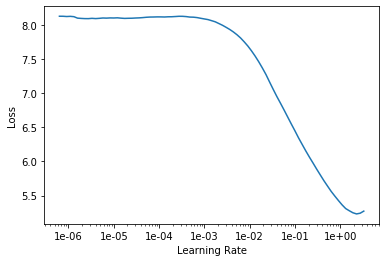

In [266]:
lm_learn.recorder.plot()

In [267]:
lm_learn.fit_one_cycle(5, max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,1.976975,1.556331,0.750130,01:21
1,1.787530,1.510712,0.754199,01:22
2,1.714722,1.430359,0.759431,01:22
3,1.596735,1.314046,0.768234,01:22
4,1.525956,1.277974,0.771815,01:22


In [269]:
lm_learn.save_encoder('word_ft_enc')

In [270]:
data_class = (TextList.from_df(df,path='.',cols=['URL'],
                processor=[OpenFileProcessor(),SPProcessor.load('.')])
        .split_from_df('is_valid')
        .label_from_df('Primary Category')
        .databunch(bs=64))

In [271]:
learn_class = text_classifier_learner(data_class,AWD_LSTM, drop_mult=0.5).to_fp16()
learn_class.load_encoder('word_ft_enc');

In [272]:
learn_class.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


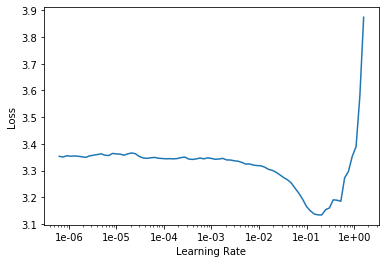

In [273]:
learn_class.recorder.plot()

In [274]:
learn_class.fit_one_cycle(10, max_lr=slice(1e-01,1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,2.369634,2.233960,0.246797,00:38
1,2.295270,2.207671,0.255380,00:42
2,2.268247,2.198490,0.261475,00:39
3,2.251833,2.178149,0.257122,00:42
4,2.236727,2.155163,0.276278,00:41
5,2.226502,2.150102,0.263839,00:42
6,2.211083,2.128643,0.269810,00:39
7,2.202698,2.122532,0.278517,00:39
8,2.199843,2.119984,0.280010,00:42
9,2.195373,2.115302,0.279512,00:40


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


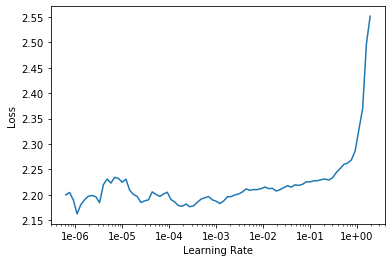

In [275]:
learn_class.lr_find()
learn_class.recorder.plot()

In [276]:
learn_class.fit_one_cycle(10, max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,2.209262,2.122754,0.274039,00:38
1,2.198908,2.113204,0.285856,00:40
2,2.209909,2.121118,0.274039,00:39
3,2.216479,2.113174,0.282747,00:38
4,2.206147,2.106716,0.289091,00:40
5,2.187623,2.110727,0.276651,00:40
6,2.202951,2.113768,0.271302,00:40
7,2.207143,2.104906,0.280632,00:42
8,2.200270,2.105926,0.277646,00:40
9,2.186136,2.100975,0.283369,00:41
